In [ ]:
pip install --index-url https://pypi.org/simple pandas scikit-learn shap tensorflow matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24

In [ ]:
import datasets
import pandas as pd
import transformers

import shap

# load the Reading the data
from google.colab import files
uploaded = files.upload()

Saving RCA_V3.csv to RCA_V3.csv


In [ ]:
import matplotlib.pyplot as plt

# Drop unnecessary columns and rename cols,
# Assuming we need only 'text' and 'label' columns
data = (pd.read_csv('RCA_V3.csv',sep=None,engine='python', usecols = ['RCA_Main_Root_Cause','RCA Defect Domain'])).dropna(how='all')
data.columns = ['text', 'label']
data.head()
print(data)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)


                                                    text        label
0      Parking position handling was not well address...       Design
1                       The SDS of WH was not up-to-date       Design
2                 Direct use of a trace definition file.  Integration
3                 Patch too old, not traceable any more.  Integration
4      Clearmake does not remove already build obsole...  Integration
...                                                  ...          ...
10735                                         SW design.       Design
10736                                         SW design.       Design
10737  A DDF timeout is not reported by the CN facili...  Realization
10738  Automated regression does not capture the impa...       Design
10739  The combination of file sizes, number of scann...        Other

[10521 rows x 2 columns]
Missing values:
 text     316
label    264
dtype: int64


In [ ]:
!pip install transformers

In [ ]:
# Load the tokenizer and model
tokenizer = transformers.AutoTokenizer.from_pretrained(
    "bert-base-uncased", use_fast=True
)
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased"
)

# Build a pipeline for predictions
prediction_pipeline = transformers.pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    device=-1,  # Use CPU
    return_all_scores=True,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
# Apply SHAP explainer, Create an explainer for the pipeline

explainer = shap.Explainer(prediction_pipeline)

In [ ]:
# Compute SHAP values
shap_values = explainer(data["text"][:5])


  0%|          | 0/306 [00:00<?, ?it/s]

PartitionExplainer explainer:  20%|██        | 1/5 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

PartitionExplainer explainer:  60%|██████    | 3/5 [01:07<00:26, 13.09s/it]

  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer:  80%|████████  | 4/5 [01:20<00:13, 13.10s/it]

  0%|          | 0/132 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 5/5 [01:40<00:00, 15.73s/it]

  0%|          | 0/132 [00:00<?, ?it/s]

PartitionExplainer explainer: 6it [01:53, 22.72s/it]


In [ ]:
# Display the shape of the SHAP values
print(f'SHAP values shape: {shap_values.shape}')

SHAP values shape: (5, None, 2)


In [ ]:
# Plot SHAP values
shap.plots.text(shap_values)

In [ ]:
# Plot SHAP values for the "anger" class
shap.plots.text(shap_values[:, :, 0])  # Assuming "anger" is the first class


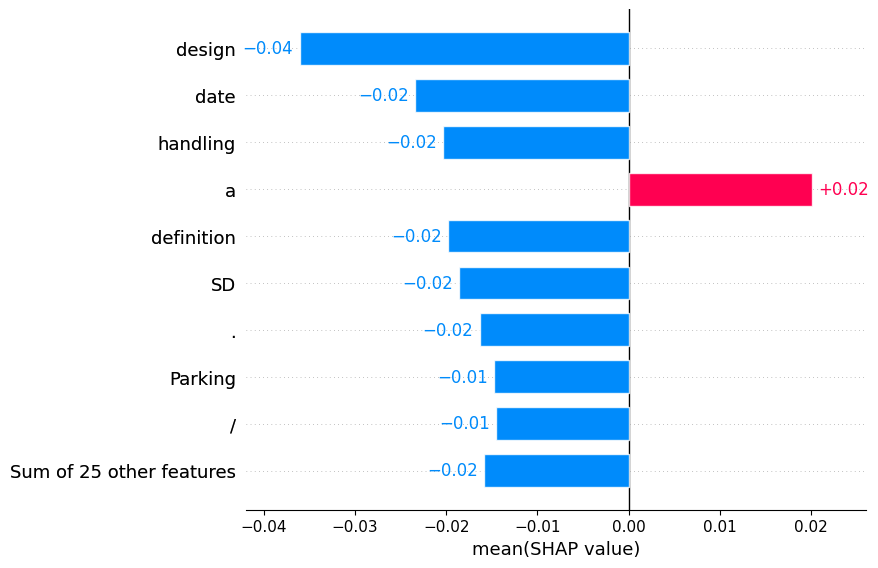

In [ ]:
# Plot SHAP values for the "joy" class
shap.plots.bar(shap_values[:, :, 1].mean(0))  # Assuming "joy" is the second class


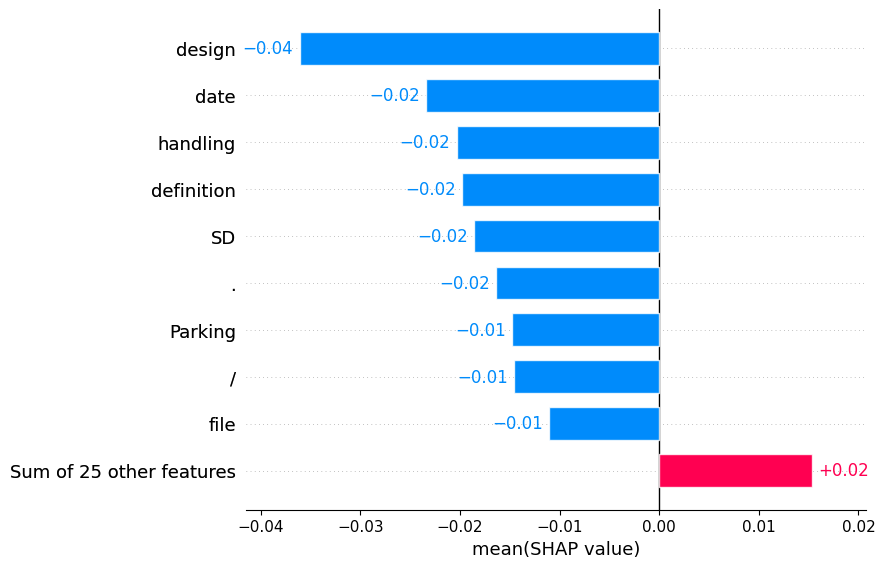

In [ ]:
# Plot SHAP values for the "joy" class
shap.plots.bar(shap_values[:, :, 1].mean(0), order=shap.Explanation.argsort)  # Assuming "joy" is the second class

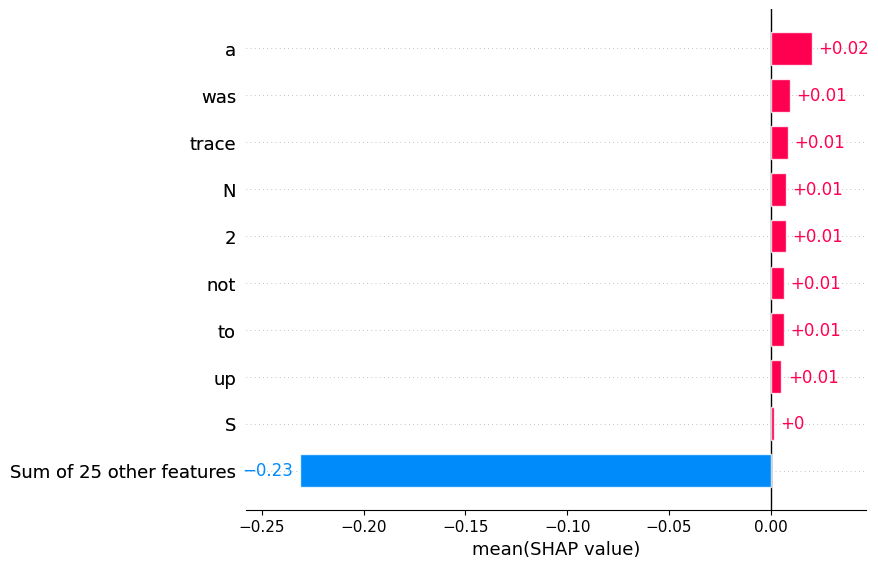

In [ ]:
# ...or acending order
shap.plots.bar(shap_values[:, :, 1].mean(0), order=shap.Explanation.argsort.flip)  # Assuming "joy" is the second class

In [ ]:

# Apply SHAP logit explainer
logit_explainer = shap.Explainer(
    shap.models.TransformersPipeline(prediction_pipeline, rescale_to_logits=True)
)

logit_shap_values = logit_explainer(data["text"][:3])

# Plot SHAP values for the logit
shap.plots.text(logit_shap_values)

  0%|          | 0/306 [00:00<?, ?it/s]

PartitionExplainer explainer:  33%|███▎      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|██████████| 3/3 [00:57<00:00, 10.57s/it]

  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [01:11, 23.68s/it]


In [ ]:
# Display the shape of the SHAP values for each example
for i, shap_array in enumerate(shap_values.values):
    print(f'SHAP values shape for example {i}: {shap_array.shape}')
    print(f'SHAP values for example {i}: {shap_array}')

SHAP values shape for example 0: (18, 2)
SHAP values for example 0: [[ 0.          0.        ]
 [ 0.00230033 -0.00230034]
 [ 0.00115326 -0.00115325]
 [ 0.00011565 -0.00011565]
 [-0.00459496  0.00459496]
 [-0.00545579  0.00545579]
 [-0.00477319  0.00477318]
 [ 0.00266002 -0.00266003]
 [-0.00262849  0.00262851]
 [ 0.00045641 -0.00045642]
 [-0.00088164  0.00088165]
 [ 0.00012522 -0.00012522]
 [-0.00202797  0.00202796]
 [-0.00072763  0.00072763]
 [-0.00197132  0.00197131]
 [-0.00094462  0.00094461]
 [ 0.00209923 -0.00209922]
 [ 0.          0.        ]]
SHAP values shape for example 1: (15, 2)
SHAP values for example 1: [[ 0.          0.        ]
 [ 0.00280004 -0.00280002]
 [ 0.00628058 -0.00628059]
 [ 0.00070824 -0.00070824]
 [ 0.000581   -0.00058097]
 [ 0.00338237 -0.00338236]
 [ 0.00135594 -0.00135593]
 [-0.00278688  0.00278689]
 [-0.00204023  0.00204023]
 [-0.00224355  0.00224354]
 [ 0.00201605 -0.00201605]
 [-0.00044035  0.00044036]
 [ 0.00434659 -0.00434658]
 [ 0.01212449 -0.01212446]